<a href="https://colab.research.google.com/github/deep1185/ga-learner-dsmp-repo/blob/master/LSTM_Models_For_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# mount drive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [2]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [4]:

# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [6]:
X.shape

(6, 3)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Building LSTM Model

In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32164.5781
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 31707.5625
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 31250.4238
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 30842.2910
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 30458.0312
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 30137.7344
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 29828.9277
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 29530.4746
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 29231.7969
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 28925.6309
Epoch 11/300
1/1 [==============================] - 0s 11ms/step - loss: 28611.5488
Epoch 12/300
1/1 [==============================] - 0s 11ms/step - loss: 28272.4473
Epoch 

Predicting For the next 10 data

In [11]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.1419]
1 day input [196.         210.         224.14190674]
1 day output [[234.06886]]
2 day input [210.         224.14190674 234.06886292]
2 day output [[247.97418]]
3 day input [224.1419  234.06886 247.97418]
3 day output [[261.9753]]
4 day input [234.06886 247.97418 261.9753 ]
4 day output [[273.61325]]
5 day input [247.97418 261.9753  273.61325]
5 day output [[288.18423]]
6 day input [261.9753  273.61325 288.18423]
6 day output [[302.77908]]
7 day input [273.61325 288.18423 302.77908]
7 day output [[316.41852]]
8 day input [288.18423 302.77908 316.41852]
8 day output [[332.17798]]
9 day input [302.77908 316.41852 332.17798]
9 day output [[348.0422]]
[224.1419, 234.06886, 247.97418, 261.9753, 273.61325, 288.18423, 302.77908, 316.41852, 332.17798, 348.0422]


In [12]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
len(timeseries_data)

9

In [14]:
lst_output

[224.1419,
 234.06886,
 247.97418,
 261.9753,
 273.61325,
 288.18423,
 302.77908,
 316.41852,
 332.17798,
 348.0422]

Visualizaing The Output

In [17]:
import matplotlib.pyplot as plt

In [18]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

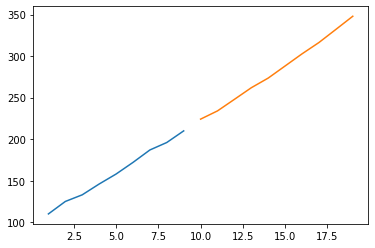

In [19]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)